<a href="https://colab.research.google.com/github/badhon1512/Data-Analysis/blob/main/indian_phone_usage_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
akashsharma0105_phone_usage_in_india_path = kagglehub.dataset_download('akashsharma0105/phone-usage-in-india')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/kaggle/input/phone-usage-in-india/phone_usage_india.csv")

In [ ]:
df.head(10)

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media
5,U00006,21,Male,Jaipur,Oppo,iOS,5.4,10.6,210.6,25,4.2,6285,0.6,4.8,1749,Entertainment
6,U00007,57,Female,Lucknow,Apple,iOS,6.0,35.2,154.5,123,0.8,2653,2.9,2.3,1073,Social Media
7,U00008,56,Other,Kolkata,Realme,iOS,3.1,43.5,125.3,188,2.3,9767,5.2,5.0,1136,Entertainment
8,U00009,46,Female,Kolkata,Oppo,Android,5.3,46.4,21.3,194,3.7,2870,6.1,2.8,1253,Entertainment
9,U00010,44,Other,Kolkata,Apple,iOS,9.9,10.6,180.2,84,4.8,9193,7.6,0.4,168,Education


## Data Stat

In [ ]:
df.isnull().sum()

User ID                         0
Age                             0
Gender                          0
Location                        0
Phone Brand                     0
OS                              0
Screen Time (hrs/day)           0
Data Usage (GB/month)           0
Calls Duration (mins/day)       0
Number of Apps Installed        0
Social Media Time (hrs/day)     0
E-commerce Spend (INR/month)    0
Streaming Time (hrs/day)        0
Gaming Time (hrs/day)           0
Monthly Recharge Cost (INR)     0
Primary Use                     0
dtype: int64

In [ ]:
len(df)

17686

In [ ]:
df['Age'].mean()

37.58424742734366

## Most used cell phone in india

In [ ]:
df['Phone Brand'].mode()

0    Nokia
Name: Phone Brand, dtype: object

### Exploratory Data Analysis (EDA)

In [ ]:
value_count_p_b = df['Phone Brand'].value_counts()

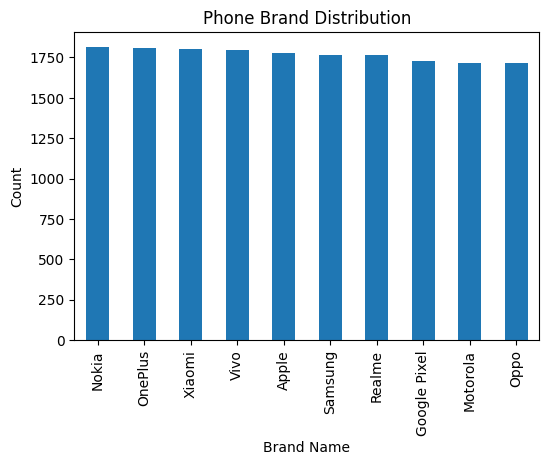

In [ ]:
value_count_p_b.plot(kind="bar", figsize=(6, 4))
plt.title("Phone Brand Distribution")
plt.xlabel("Brand Name")
plt.ylabel("Count")
plt.show()

## Insight: Evenly distributed

In [ ]:
value_count_usages = df['Primary Use'].value_counts()

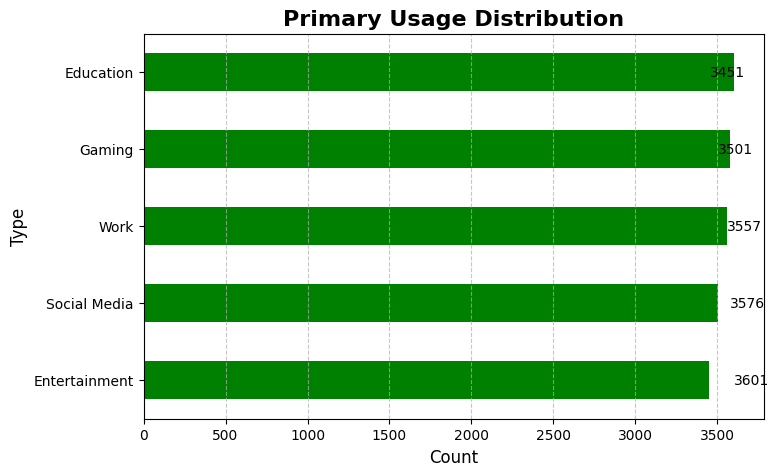

In [ ]:
value_count_usages.sort_values().plot(kind="barh", figsize=(8, 5), color='green')
plt.title("Primary Usage Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Type", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add annotations
for index, value in enumerate(value_count_usages.values):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10)

plt.show()


### Gender vs Screen Time

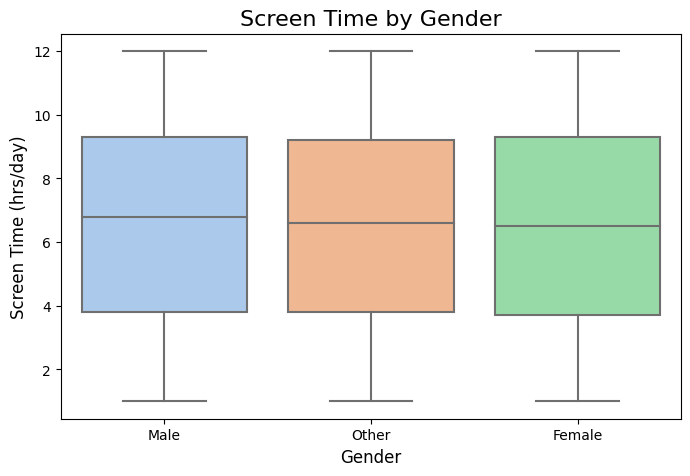

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Screen Time (hrs/day)', data=df, palette='pastel')
plt.title('Screen Time by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Screen Time (hrs/day)', fontsize=12)
plt.show()


### Data Usage vs Screen Time Scatter Plot

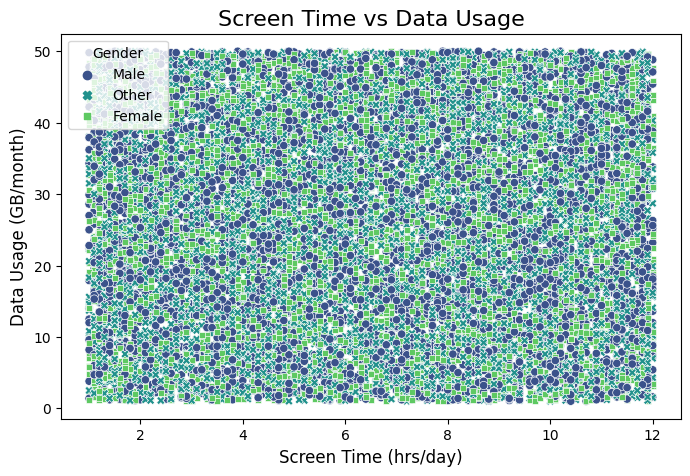

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Screen Time (hrs/day)', y='Data Usage (GB/month)', hue='Gender', style='Gender', data=df, palette='viridis')
plt.title('Screen Time vs Data Usage', fontsize=16)
plt.xlabel('Screen Time (hrs/day)', fontsize=12)
plt.ylabel('Data Usage (GB/month)', fontsize=12)
plt.show()


### Monthly Recharge Cost by Age Group

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


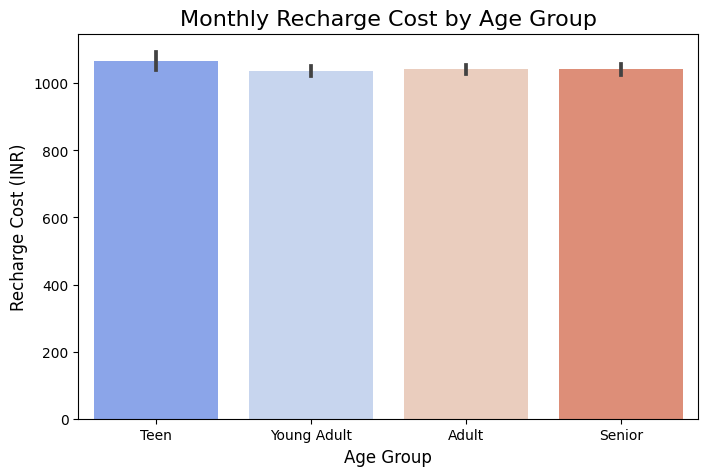

In [ ]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['Teen', 'Young Adult', 'Adult', 'Senior'])

plt.figure(figsize=(8, 5))
sns.barplot(x='Age Group', y='Monthly Recharge Cost (INR)', data=df, palette='coolwarm')
plt.title('Monthly Recharge Cost by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Recharge Cost (INR)', fontsize=12)
plt.show()


### Social Media, Gaming, and Streaming Time Comparison

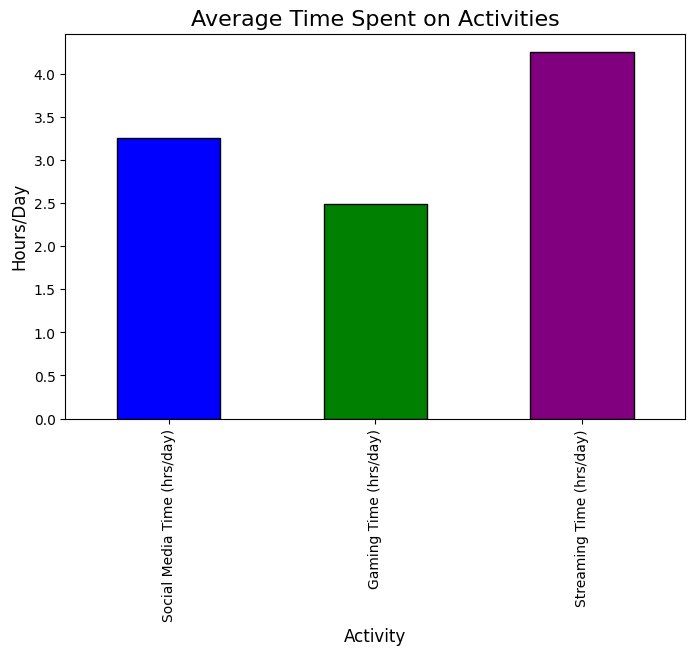

In [ ]:
plt.figure(figsize=(8, 5))
df[['Social Media Time (hrs/day)', 'Gaming Time (hrs/day)', 'Streaming Time (hrs/day)']].mean().plot(kind='bar', color=['blue', 'green', 'purple'], edgecolor='black')
plt.title('Average Time Spent on Activities', fontsize=16)
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Hours/Day', fontsize=12)
plt.show()


### E-commerce Spend by Primary Use

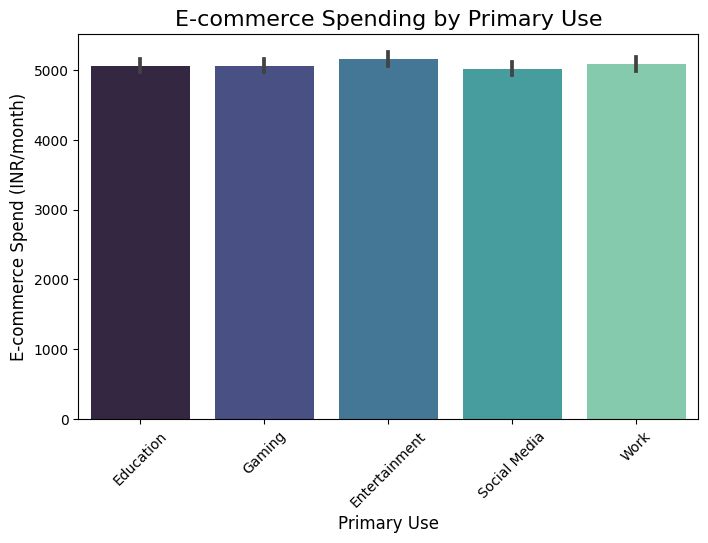

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Primary Use', y='E-commerce Spend (INR/month)', data=df, palette='mako')
plt.title('E-commerce Spending by Primary Use', fontsize=16)
plt.xlabel('Primary Use', fontsize=12)
plt.ylabel('E-commerce Spend (INR/month)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


## Corelation Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

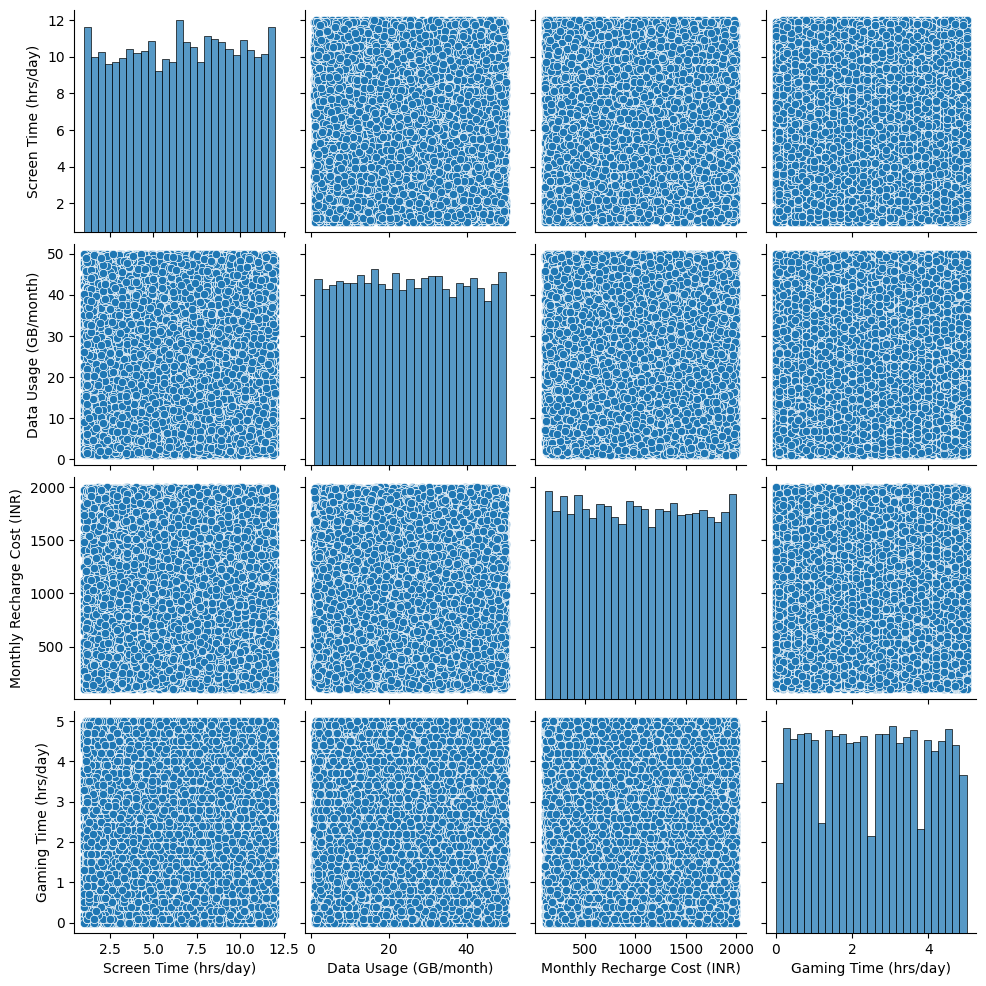

In [ ]:
sns.pairplot(df, vars=['Screen Time (hrs/day)', 'Data Usage (GB/month)', 'Monthly Recharge Cost (INR)', 'Gaming Time (hrs/day)'])
plt.show()

### Scatter plot for Screen Time vs Data Usage


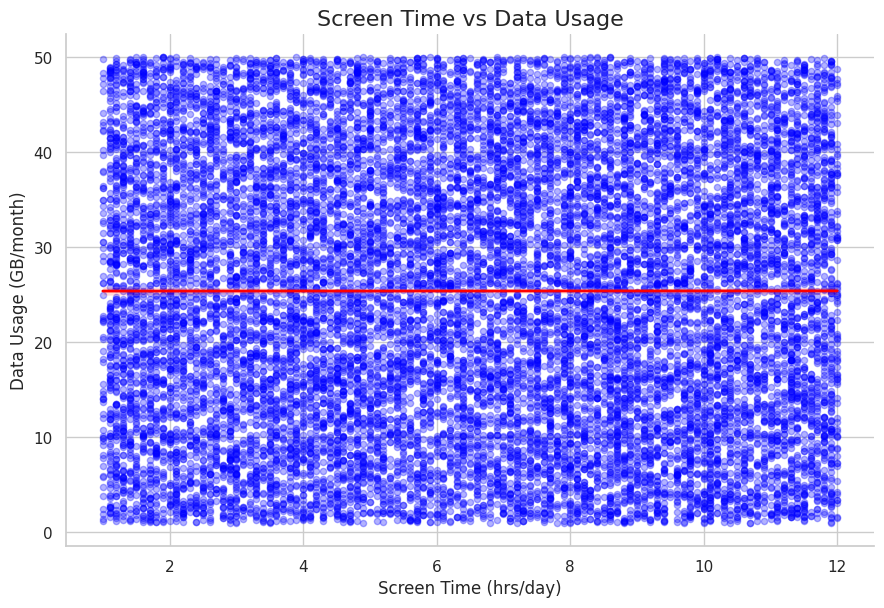

In [ ]:
sns.lmplot(
    x='Screen Time (hrs/day)',
    y='Data Usage (GB/month)',
    data=df,
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.3, 's': 20, 'color': 'blue'},  # Reduced opacity and size
    line_kws={'color': 'red', 'linewidth': 2}             # Regression line style
)
plt.title('Screen Time vs Data Usage', fontsize=16)
plt.show()


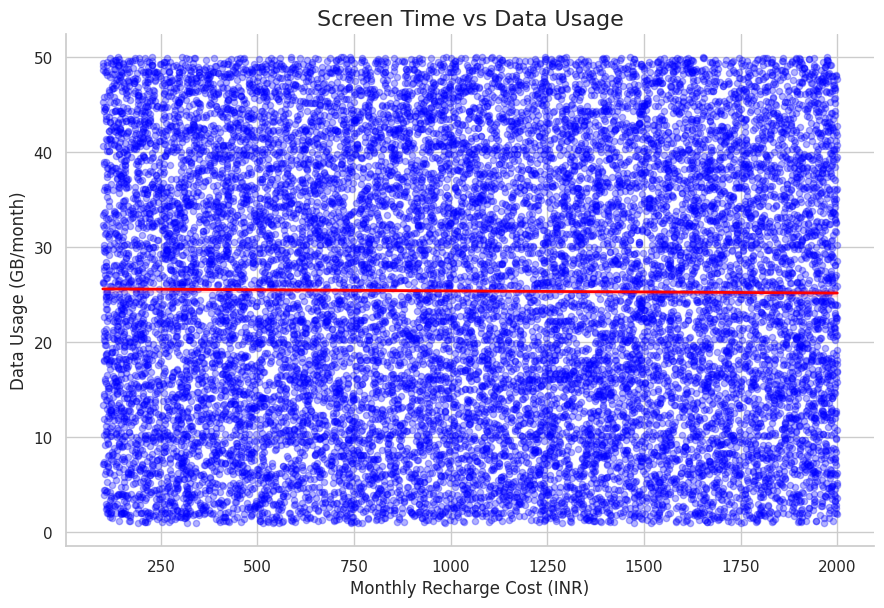

In [ ]:
sns.lmplot(
    x='Monthly Recharge Cost (INR)',
    y='Data Usage (GB/month)',
    data=df,
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.3, 's': 20, 'color': 'blue'},  # Reduced opacity and size
    line_kws={'color': 'red', 'linewidth': 2}             # Regression line style
)
plt.title('Screen Time vs Data Usage', fontsize=16)
plt.show()


In [ ]:
sns.pairplot(df, vars=['Screen Time (hrs/day)', 'Data Usage (GB/month)', 'Monthly Recharge Cost (INR)', 'Gaming Time (hrs/day)'])


In [ ]:
corr = df['Monthly Recharge Cost (INR)'].corr(df['Data Usage (GB/month)'])
print(f"Correlation: {corr}")


Correlation: -0.00891506632462853


# Clustering Analysis (Segment Users)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## Selecting significant features

In [ ]:
features = df[['Screen Time (hrs/day)', 'Data Usage (GB/month)', 'Gaming Time (hrs/day)', 'Calls Duration (mins/day)']]

### Scale the features


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

##  KMeans clustering


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluesters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Feature Comparisons Across Clusters

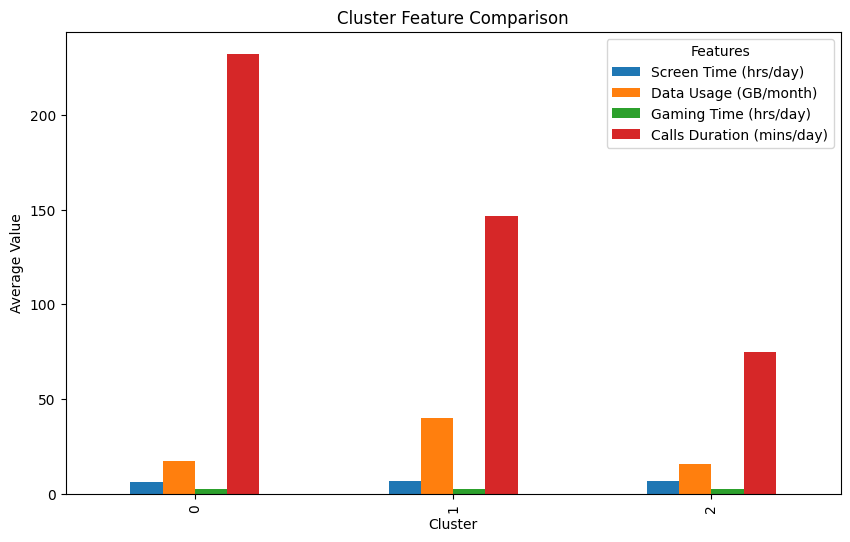

In [ ]:
cluster_features = df.groupby('Cluster')[['Screen Time (hrs/day)', 'Data Usage (GB/month)', 'Gaming Time (hrs/day)', 'Calls Duration (mins/day)']].mean()

# Plot
cluster_features.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Feature Comparison')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.legend(title='Features')
plt.show()
